<a href="https://colab.research.google.com/github/cph316/generative_ai/blob/main/%E3%80%90HW4%E3%80%910311_%E6%B8%AC%E8%A9%A6(prompts)_(ChatGPT%E3%80%81Claude).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

請用 Python 撰寫一個程式，使其能夠在螢幕上顯示會隨機往下掉落的彩色球體，請確保運動符合物理定律。



1. ChatGPT-4o 撰寫的程式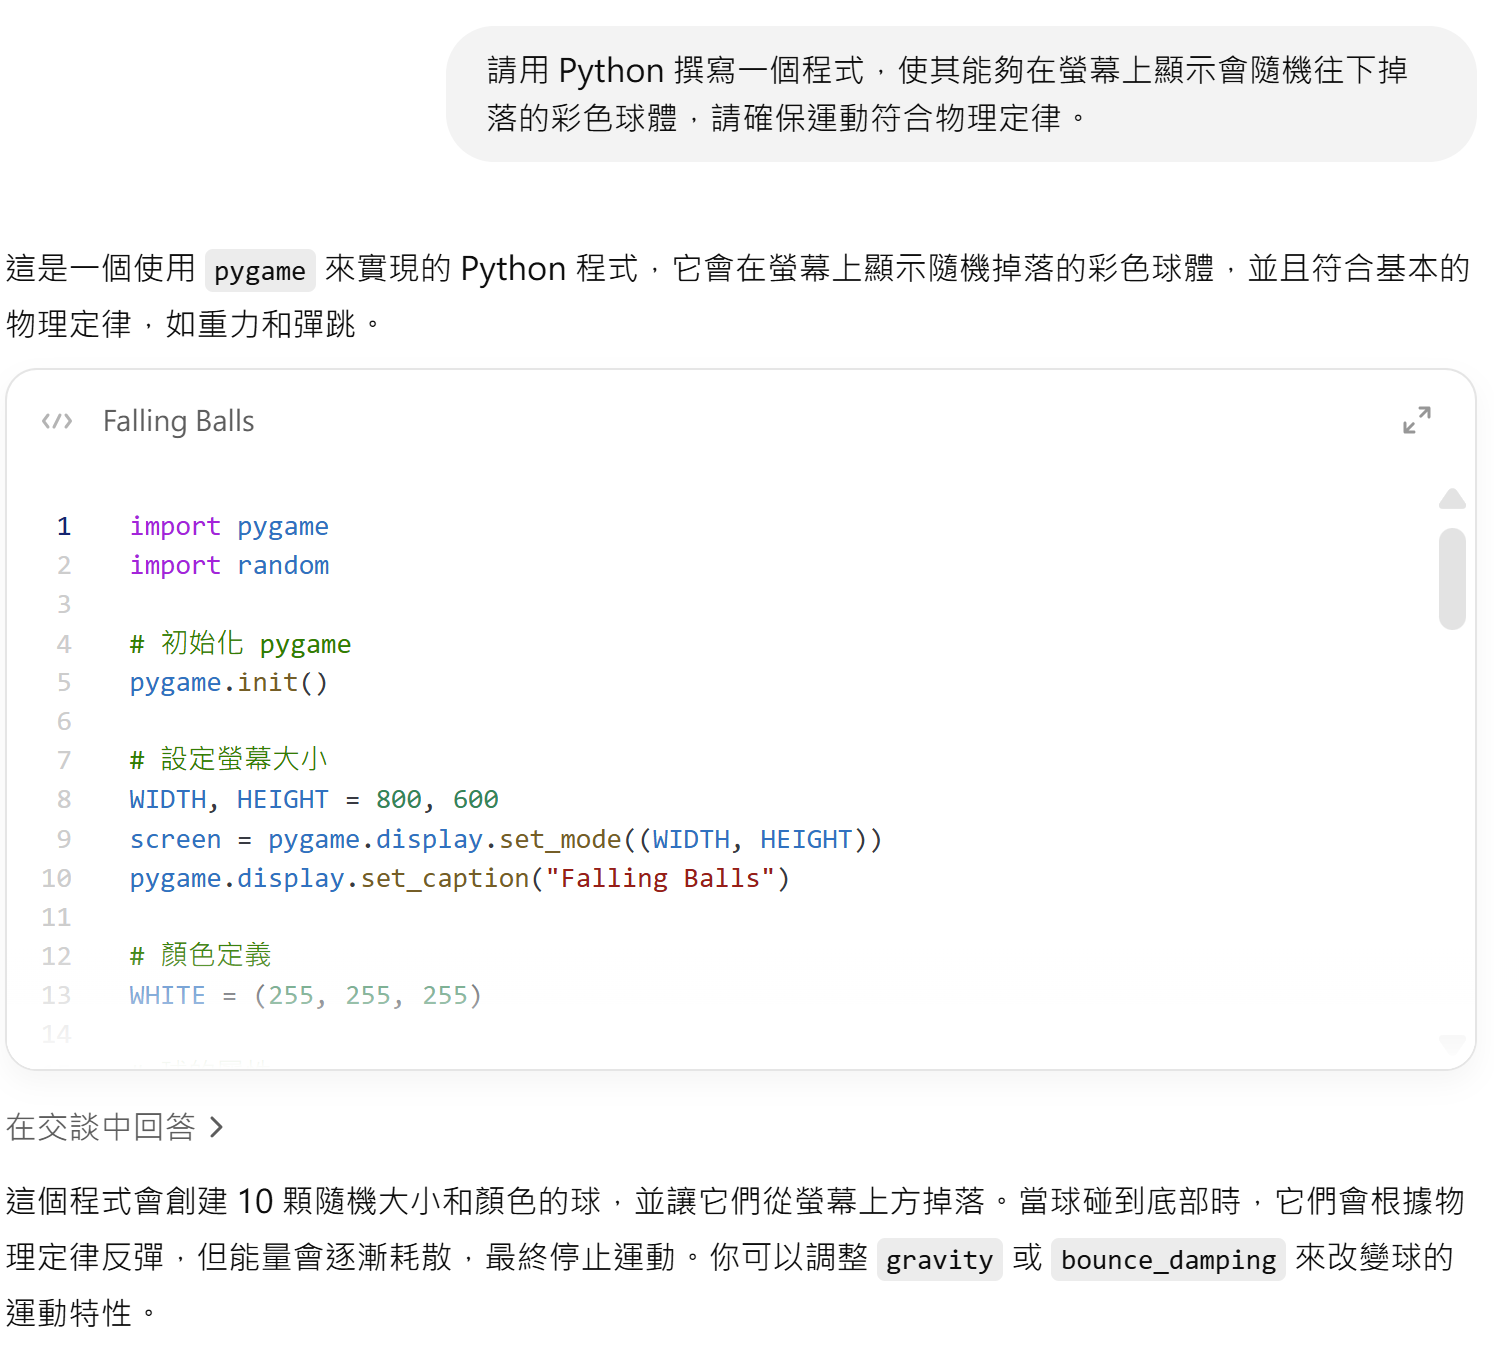

<ipython-input-4-3b1493313bef>:69: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)


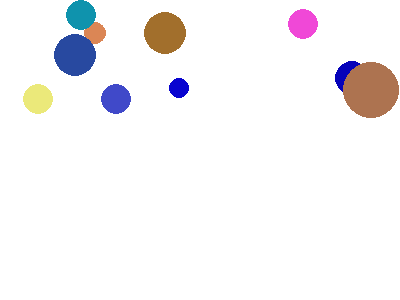

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 安裝 pygame 與 imageio
!pip install pygame imageio

import pygame
import random
import imageio
from IPython.display import display, Image
from google.colab import files

# 設定螢幕大小
WIDTH, HEIGHT = 400, 300

# 球的屬性
class Ball:
    def __init__(self):
        self.radius = random.randint(10, 30)
        self.x = random.randint(self.radius, WIDTH - self.radius)
        self.y = random.randint(self.radius, HEIGHT // 3)
        self.color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        self.velocity_y = 0  # 初速度
        self.gravity = 0.5  # 重力加速度
        self.bounce_damping = 0.7  # 彈性係數

    def update(self):
        self.velocity_y += self.gravity  # 速度因重力增加
        self.y += self.velocity_y  # 位置更新

        # 碰撞地面時反彈
        if self.y + self.radius >= HEIGHT:
            self.y = HEIGHT - self.radius  # 確保不穿透地面
            self.velocity_y = -self.velocity_y * self.bounce_damping  # 反彈並減速

            # 若速度過小則停止
            if abs(self.velocity_y) < 1:
                self.velocity_y = 0

    def draw(self, screen):
        pygame.draw.circle(screen, self.color, (int(self.x), int(self.y)), self.radius)


# 主要函數 - 產生 GIF 並儲存
def main():
    pygame.init()
    screen = pygame.Surface((WIDTH, HEIGHT))  # 建立 Surface 物件（無需 GUI）
    clock = pygame.time.Clock()
    balls = [Ball() for _ in range(10)]  # 生成 10 顆球
    frames = []

    for frame_num in range(100):  # 產生 100 幀影像
        screen.fill((255, 255, 255))  # 白色背景

        for ball in balls:
            ball.update()
            ball.draw(screen)

        # 儲存畫面
        filename = f"frame_{frame_num:03d}.png"
        pygame.image.save(screen, filename)
        frames.append(filename)

        clock.tick(30)  # 30 FPS

    pygame.quit()

    # 建立 GIF 動畫
    gif_filename = "falling_balls.gif"
    with imageio.get_writer(gif_filename, mode="I", duration=0.05) as writer:
        for frame in frames:
            image = imageio.imread(frame)
            writer.append_data(image)

    # 顯示 GIF
    display(Image(gif_filename))

    # 下載 GIF 檔案
    files.download(gif_filename)

# 執行動畫生成並儲存
main()



2. Claude-Sonnet 3.7 撰寫的程式
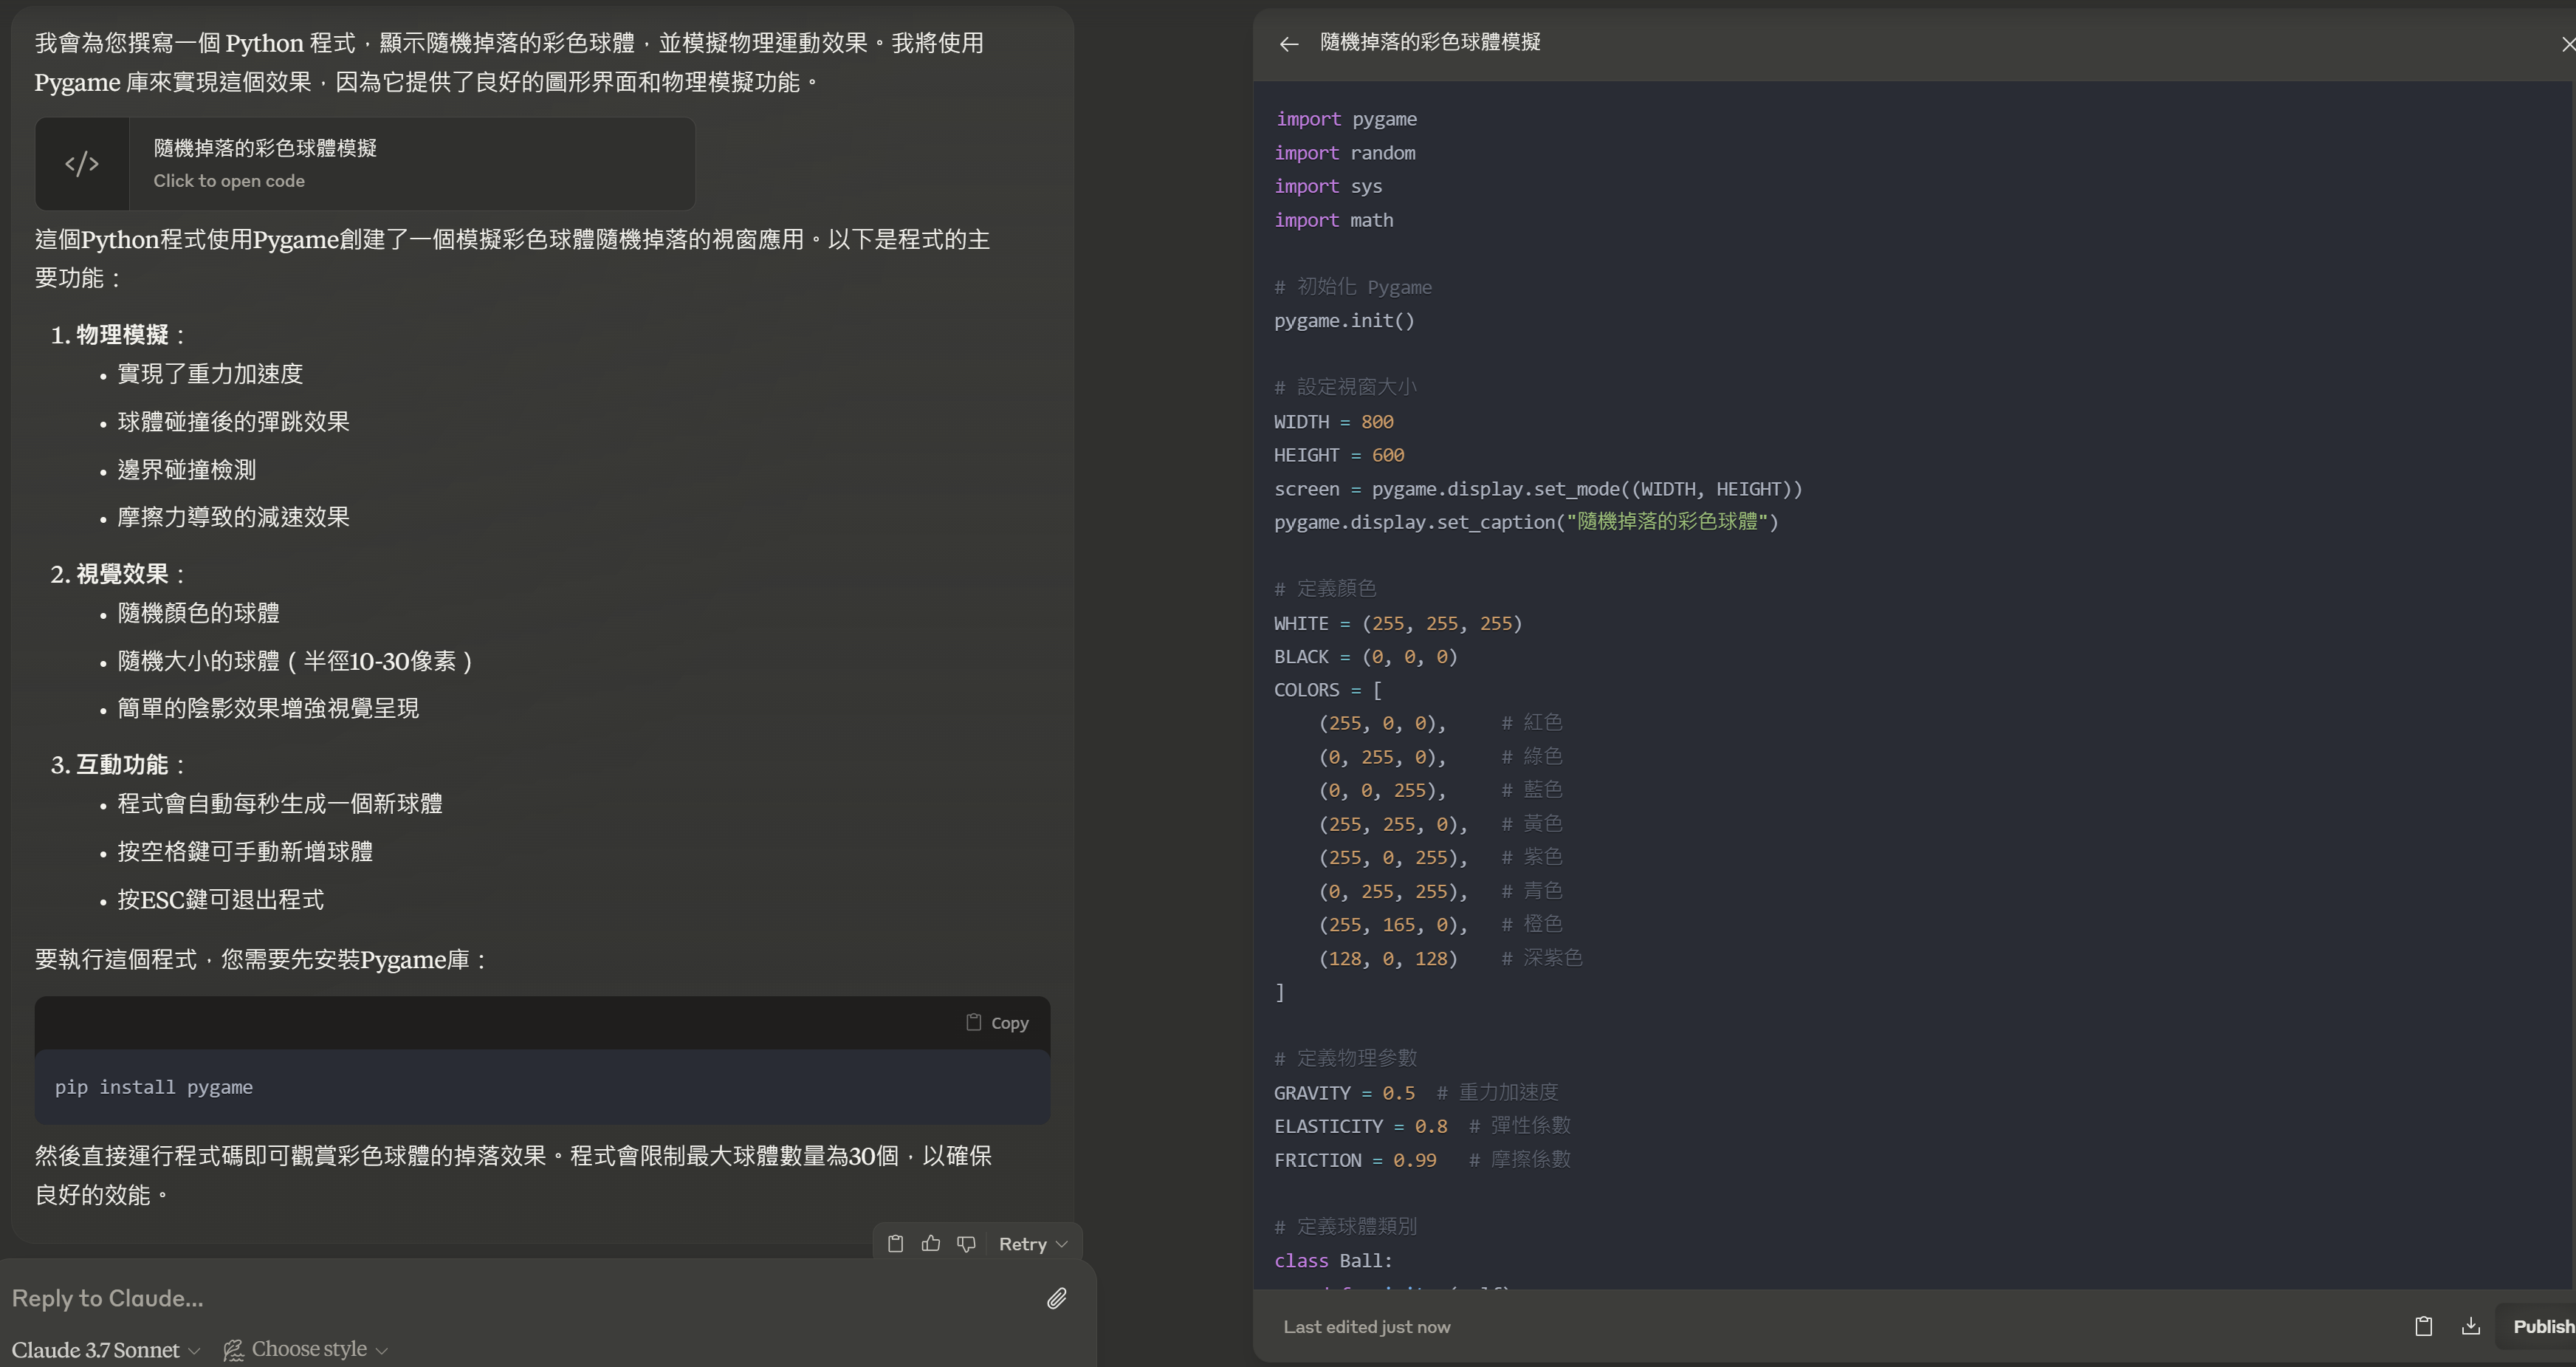

已生成 0 幀，共 100 幀...
已生成 10 幀，共 100 幀...
已生成 20 幀，共 100 幀...
已生成 30 幀，共 100 幀...
已生成 40 幀，共 100 幀...
已生成 50 幀，共 100 幀...
已生成 60 幀，共 100 幀...
已生成 70 幀，共 100 幀...
已生成 80 幀，共 100 幀...
已生成 90 幀，共 100 幀...
所有幀已生成，正在創建GIF...



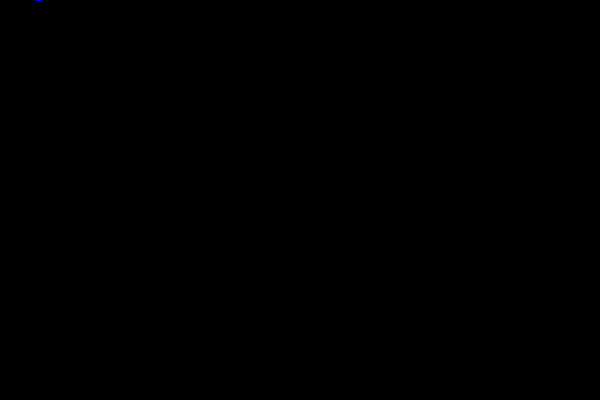

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GIF動畫已生成並提供下載：falling_balls_claude.gif


In [ ]:
# 安裝必要的套件
!pip install pygame pillow imageio

# 導入必要的庫
import pygame
import random
import numpy as np
import os
import imageio
from PIL import Image
from google.colab import files
import io
import base64
from IPython.display import HTML, display

# 初始化 Pygame
pygame.init()

# 設定視窗大小
WIDTH = 600
HEIGHT = 400
surface = pygame.Surface((WIDTH, HEIGHT))

# 定義顏色
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
COLORS = [
    (255, 0, 0),     # 紅色
    (0, 255, 0),     # 綠色
    (0, 0, 255),     # 藍色
    (255, 255, 0),   # 黃色
    (255, 0, 255),   # 紫色
    (0, 255, 255),   # 青色
    (255, 165, 0),   # 橙色
    (128, 0, 128)    # 深紫色
]

# 定義物理參數
GRAVITY = 0.5  # 重力加速度
ELASTICITY = 0.8  # 彈性係數
FRICTION = 0.99   # 摩擦係數

# 定義球體類別
class Ball:
    def __init__(self):
        self.radius = random.randint(10, 25)
        self.x = random.randint(self.radius, WIDTH - self.radius)
        self.y = -self.radius  # 起始位置在畫面上方
        self.color = random.choice(COLORS)
        self.vel_x = random.uniform(-2, 2)  # 初始水平速度
        self.vel_y = 0  # 初始垂直速度
        self.mass = self.radius * 0.5  # 質量與半徑成正比

    def update(self):
        # 應用重力
        self.vel_y += GRAVITY

        # 應用摩擦力
        self.vel_x *= FRICTION

        # 更新位置
        self.x += self.vel_x
        self.y += self.vel_y

        # 碰撞檢測：地面
        if self.y + self.radius > HEIGHT:
            self.y = HEIGHT - self.radius
            self.vel_y = -self.vel_y * ELASTICITY

            # 如果球體幾乎停止，停止其垂直運動
            if abs(self.vel_y) < 0.5:
                self.vel_y = 0

        # 碰撞檢測：左右邊界
        if self.x - self.radius < 0:
            self.x = self.radius
            self.vel_x = -self.vel_x * ELASTICITY
        elif self.x + self.radius > WIDTH:
            self.x = WIDTH - self.radius
            self.vel_x = -self.vel_x * ELASTICITY

    def draw(self, surface):
        # 繪製球體
        pygame.draw.circle(surface, self.color, (int(self.x), int(self.y)), self.radius)

        # 簡單陰影效果
        shadow_radius = int(self.radius * 0.8)
        if shadow_radius > 0:
            s = pygame.Surface((shadow_radius*2, shadow_radius*2), pygame.SRCALPHA)
            pygame.draw.circle(s, (*self.color, 100), (shadow_radius, shadow_radius), shadow_radius)
            surface.blit(s, (int(self.x) - shadow_radius, int(self.y) - shadow_radius))

# 將pygame表面轉換為PIL圖像
def surface_to_pil_image(surface):
    image_data = pygame.surfarray.array3d(surface)
    image_data = image_data.transpose([1, 0, 2])
    return Image.fromarray(image_data.astype('uint8'))

# 創建臨時目錄來存儲幀
frame_dir = "frames"
if not os.path.exists(frame_dir):
    os.mkdir(frame_dir)

# 清除現有幀
for file in os.listdir(frame_dir):
    if file.startswith("frame_") and file.endswith(".png"):
        os.remove(os.path.join(frame_dir, file))

def main():
    # 創建時鐘控制幀率
    clock = pygame.time.Clock()
    balls = []
    frames = []  # 儲存所有幀的列表

    # 設定模擬參數
    frame_count = 100  # 總共產生100幀
    fps = 20  # 設定GIF的每秒幀數

    # 主循環
    for i in range(frame_count):
        # 每4幀添加一個新球
        if i % 4 == 0 and len(balls) < 30:
            balls.append(Ball())

        # 更新所有球體
        for ball in balls:
            ball.update()

        # 清除畫面
        surface.fill(BLACK)

        # 繪製所有球體
        for ball in balls:
            ball.draw(surface)

        # 將當前幀保存為圖像
        frame_filename = os.path.join(frame_dir, f"frame_{i:03d}.png")
        img = surface_to_pil_image(surface)
        img.save(frame_filename)
        frames.append(img)

        # 顯示進度
        if i % 10 == 0:
            print(f"已生成 {i} 幀，共 {frame_count} 幀...")

        # 控制幀率
        clock.tick(30)

    print("所有幀已生成，正在創建GIF...")

    # 創建GIF動畫
    gif_filename = "falling_balls_claude.gif"
    imageio.mimsave(gif_filename, frames, fps=fps)

    # 顯示GIF動畫
    with open(gif_filename, "rb") as f:
        gif_data = f.read()
    gif_base64 = base64.b64encode(gif_data).decode("ascii")
    display(HTML(f"""
    <h3>彩色球體掉落動畫</h3>
    <img src="data:image/gif;base64,{gif_base64}" alt="彩色球體掉落動畫" width="{WIDTH}px">
    <p>動畫已生成完成，請點擊下方按鈕下載。</p>
    """))

    # 提供下載
    files.download(gif_filename)
    print(f"GIF動畫已生成並提供下載：{gif_filename}")

if __name__ == "__main__":
    main()

1.ChatGPT 的球為同時落下並沒有隨機不同時間落下

2.Claude 的球會不斷隨機落下

3.兩者落下動作都符合物理狀態 但都會出現球體相疊的狀況

4.兩者相比 Claude對於程式的理解較好